In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [3]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [4]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [5]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0301-0001.jpeg
pneumonia picture title: person15_virus_46.jpeg


Text(0.5, 1.0, 'Pneumonia')

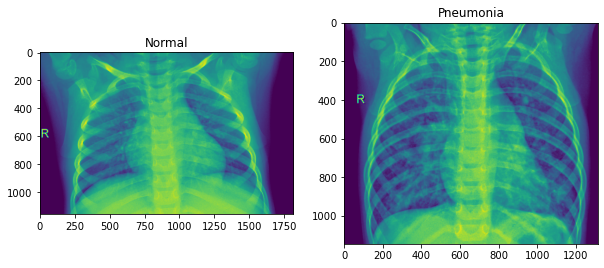

In [6]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [7]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [8]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [9]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 100)

Epoch 1/100
163/163 [==============================] - 57s 352ms/step - loss: 0.4986 - tp: 3911.0000 - fp: 1310.0000 - tn: 3906.0000 - fn: 1305.0000 - accuracy: 0.7493 - precision: 0.7491 - recall: 0.7498 - auc: 0.8356 - val_loss: 0.6596 - val_tp: 247.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 57.0000 - val_accuracy: 0.7812 - val_precision: 0.7647 - val_recall: 0.8125 - val_auc: 0.7109
Epoch 2/100
163/163 [==============================] - 50s 310ms/step - loss: 0.3580 - tp: 4415.0000 - fp: 801.0000 - tn: 4415.0000 - fn: 801.0000 - accuracy: 0.8464 - precision: 0.8464 - recall: 0.8464 - auc: 0.9200 - val_loss: 0.6429 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7461
Epoch 3/100
163/163 [==============================] - 51s 312ms/step - loss: 0.3294 - tp: 4549.0000 - fp: 708.0000 - tn: 4508.0000 - fn: 667.0000 - accuracy: 0.8682 - precision: 0.8653 - recall: 0.8721 - a

Epoch 22/100
163/163 [==============================] - 51s 312ms/step - loss: 0.1542 - tp: 4901.0000 - fp: 303.0000 - tn: 4913.0000 - fn: 315.0000 - accuracy: 0.9408 - precision: 0.9418 - recall: 0.9396 - auc: 0.9851 - val_loss: 0.4912 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8359
Epoch 23/100
163/163 [==============================] - 50s 310ms/step - loss: 0.1590 - tp: 4903.0000 - fp: 317.0000 - tn: 4899.0000 - fn: 313.0000 - accuracy: 0.9396 - precision: 0.9393 - recall: 0.9400 - auc: 0.9842 - val_loss: 0.3365 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9492
Epoch 24/100
163/163 [==============================] - 50s 309ms/step - loss: 0.1462 - tp: 4930.0000 - fp: 284.0000 - tn: 4932.0000 - fn: 286.0000 - accuracy: 0.9454 - precision: 0.9455 - recall: 0.9452 - 

Epoch 43/100
163/163 [==============================] - 51s 311ms/step - loss: 0.1210 - tp: 4980.0000 - fp: 237.0000 - tn: 4979.0000 - fn: 236.0000 - accuracy: 0.9547 - precision: 0.9546 - recall: 0.9548 - auc: 0.9908 - val_loss: 0.6436 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7734
Epoch 44/100
163/163 [==============================] - 50s 309ms/step - loss: 0.1342 - tp: 4947.0000 - fp: 262.0000 - tn: 4954.0000 - fn: 269.0000 - accuracy: 0.9491 - precision: 0.9497 - recall: 0.9484 - auc: 0.9886 - val_loss: 0.4815 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8438
Epoch 45/100
163/163 [==============================] - 51s 311ms/step - loss: 0.1259 - tp: 4959.0000 - fp: 248.0000 - tn: 4968.0000 - fn: 257.0000 - accuracy: 0.9516 - precision: 0.9524 - recall: 0.9507 - 

Epoch 64/100
163/163 [==============================] - 49s 301ms/step - loss: 0.1199 - tp: 4975.0000 - fp: 238.0000 - tn: 4978.0000 - fn: 241.0000 - accuracy: 0.9541 - precision: 0.9543 - recall: 0.9538 - auc: 0.9908 - val_loss: 0.5158 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8203
Epoch 65/100
163/163 [==============================] - 49s 303ms/step - loss: 0.1157 - tp: 5002.0000 - fp: 214.0000 - tn: 5002.0000 - fn: 214.0000 - accuracy: 0.9590 - precision: 0.9590 - recall: 0.9590 - auc: 0.9912 - val_loss: 0.4132 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8633
Epoch 66/100
163/163 [==============================] - 49s 300ms/step - loss: 0.1111 - tp: 5002.0000 - fp: 218.0000 - tn: 4998.0000 - fn: 214.0000 - accuracy: 0.9586 - precision: 0.9582 - recall: 0.9590 - 

Epoch 85/100
163/163 [==============================] - 49s 301ms/step - loss: 0.1116 - tp: 5001.0000 - fp: 210.0000 - tn: 5006.0000 - fn: 215.0000 - accuracy: 0.9593 - precision: 0.9597 - recall: 0.9588 - auc: 0.9915 - val_loss: 0.3912 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9238
Epoch 86/100
163/163 [==============================] - 49s 299ms/step - loss: 0.1043 - tp: 5009.0000 - fp: 202.0000 - tn: 5014.0000 - fn: 207.0000 - accuracy: 0.9608 - precision: 0.9612 - recall: 0.9603 - auc: 0.9928 - val_loss: 0.4575 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8711
Epoch 87/100
163/163 [==============================] - 49s 302ms/step - loss: 0.1113 - tp: 5014.0000 - fp: 197.0000 - tn: 5019.0000 - fn: 202.0000 - accuracy: 0.9618 - precision: 0.9622 - recall: 0.9613 - 

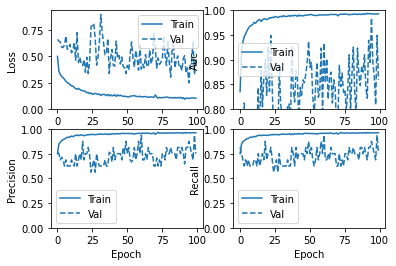

In [10]:
cnn.plot_history()

In [11]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.94      0.82      0.87       234
   PNEUMONIA       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624

None


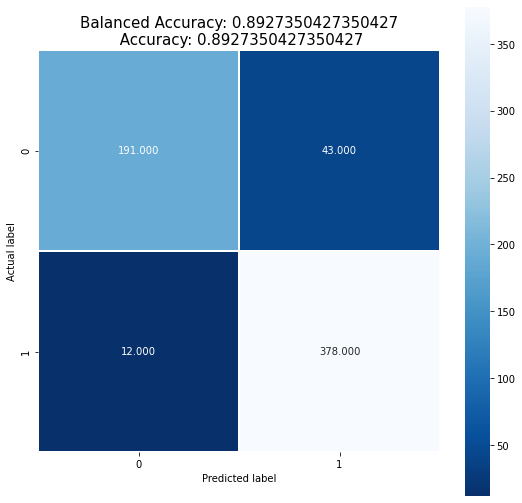

In [12]:
cnn.display_confusion_matrix(test_data_generator = test_set)